In [1]:
from parfamwrapper import ParFamWrapper

import sympy
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/math/scholl/projects/physicalLawLearning/parfam
Using cpu.


In [2]:
# Collection of function for ParFam to use, can be readily extended

function_dict = {'sqrt': lambda x: torch.sqrt(torch.abs(x)),
                 'exp': lambda x: torch.minimum(torch.exp(x), np.exp(10) + torch.abs(x)),
                 'log': lambda x: torch.log(torch.abs(x) + 0.000001),
                 'cos': torch.cos, 'sin': torch.sin}
function_name_dict = {'sqrt': lambda x: sympy.sqrt(sympy.Abs(x)), 'exp': sympy.exp, 'cos': sympy.cos, 'sin': sympy.sin,
                      'log': lambda x: sympy.log(sympy.Abs(x) + 0.000001)}

standard_function_names_str = ['sin', 'sqrt', 'exp', 'sqrt'] 
standard_functions = [function_dict[key] for key in standard_function_names_str]
standard_function_names = [function_name_dict[key] for key in standard_function_names_str]

# Basic functionality

## One dimensional problem

In [3]:
device = 'cpu'

a = 2 * torch.randn(1)

x = np.arange(1, 5, 0.2)  # 1 dimensional 
x = x.reshape(len(x), 1)  # 1 dimensional 
print(x.shape) 
x = torch.tensor(x, device=device)

def func(a, x, module):
    # return module.sin((a[0] * x + 1) / (0.1 * x + 2))
    # return module.sin((a[0] * x + 1) / (0.1 * x)) 
    # return module.sin((a[0] * x)) 
    # return a[0] * x / (1+x)
    return 0.2 * module.sin(a[0] * x) / x
    # return 0.5 * x / (x + 1)
    # return module.log(x + 1.4) + module.log(x ** 2 + 1.3)
    # return module.sin(x ** 2) * module.cos(x) - 1

y = func(a, x, np).squeeze(1)
x_sym = sympy.symbols('x')

target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(20, 1)
Target formula: -0.2*sin(0.230854243040085*x)/x


In [4]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [5]:
# The config picks defines all the model and training parameter choices. See config_files/wrapper. 'small' is the default. For bigger experiments, for example those in SRBench, choose 'big'.
# Every additional variable overwrites the settings in the config. E.g., we restrict the functions we use to being simply the sin function.
parfam = ParFamWrapper(config_name='small', iterate=True, functions=functions, function_names=function_names)
parfam.fit(x, y, time_limit=100)  # time_limit is in seconds, might have to be higher for higher dimensions and more complicated parametric families

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1628: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 3
INFO:root:Number parameters active: 3
INFO:root:Number of evaluations: 507
INFO:root:Relative l2 distance train: 0.004583417815819734
INFO:root:Relative l2 distance validation: 0.007769162867236745


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 20, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 3
Number parameters active: 3
Training time: 0.140179634

INFO:root:Number of evaluations: 2190
INFO:root:Relative l2 distance train: 0.02898118051313699
INFO:root:Relative l2 distance validation: 0.03306080474434832
INFO:root:Training time: 0.7206802368164062
INFO:root:Cumulative training time: 0.8638942241668701
INFO:root:Cumulative number of evaluations: 2697
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training time: 0.7206802368164062
Target expression: None
Relative l_2-distance train: 0.02898118051313699
Relative l_2-distance validation: 0.03306080474434832
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 1910
INFO:root:Relative l2 distance train: 0.053585320463667145
INFO:root:Relative l2 distance validation: 0.06611950845378721
INFO:root:Training time: 1.1952338218688965
INFO:root:Cumulative training time: 2.060877561569214
INFO:root:Cumulative number of evaluations: 4607
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training time: 1.1952338218688965
Target expression: None
Relative l_2-distance train: 0.053585320463667145
Relative l_2-distance validation: 0.06611950845378721
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 1452
INFO:root:Relative l2 distance train: 0.18414238207863287
INFO:root:Relative l2 distance validation: 0.17536398160191327
INFO:root:Training time: 0.6170718669891357
INFO:root:Cumulative training time: 2.6794309616088867
INFO:root:Cumulative number of evaluations: 6059
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.6170718669891357
Target expression: None
Relative l_2-distance train: 0.18414238207863287
Relative l_2-distance validation: 0.17536398160191327
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 1276
INFO:root:Relative l2 distance train: 0.0009722588708164045
INFO:root:Relative l2 distance validation: 0.0019960037983497926
INFO:root:Training time: 0.5092406272888184
INFO:root:Cumulative training time: 3.190040349960327
INFO:root:Cumulative number of evaluations: 7335
INFO:root:New best relative l2 distance validation: 0.0019960037983497926
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 7
INFO:root:Number parameters active: 7


Training time: 0.5092406272888184
Target expression: None
Relative l_2-distance train: 0.0009722588708164045
Relative l_2-distance validation: 0.0019960037983497926
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 2006
INFO:root:Relative l2 distance train: 0.059180207655024034
INFO:root:Relative l2 distance validation: 0.0704183590336862
INFO:root:Training time: 1.056764841079712
INFO:root:Cumulative training time: 4.248532295227051
INFO:root:Cumulative number of evaluations: 9341
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 8
INFO:root:Number parameters active: 8


Training time: 1.056764841079712
Target expression: None
Relative l_2-distance train: 0.059180207655024034
Relative l_2-distance validation: 0.0704183590336862
##### Training #####
Number parameters: 8
Number parameters active: 8


INFO:root:Number of evaluations: 2669
INFO:root:Relative l2 distance train: 0.005451129550316074
INFO:root:Relative l2 distance validation: 0.004930885317764996
INFO:root:Training time: 1.3334529399871826
INFO:root:Cumulative training time: 5.5838682651519775
INFO:root:Cumulative number of evaluations: 12010
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 7
INFO:root:Number parameters active: 7


Training time: 1.3334529399871826
Target expression: None
Relative l_2-distance train: 0.005451129550316074
Relative l_2-distance validation: 0.004930885317764996
##### Training #####
Number parameters: 7
Number parameters active: 7


INFO:root:Number of evaluations: 1456
INFO:root:Relative l2 distance train: 0.006069996796973276
INFO:root:Relative l2 distance validation: 0.012176334914030636
INFO:root:Training time: 0.7962465286254883
INFO:root:Cumulative training time: 6.381833553314209
INFO:root:Cumulative number of evaluations: 13466
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 8
INFO:root:Number parameters active: 8


Training time: 0.7962465286254883
Target expression: None
Relative l_2-distance train: 0.006069996796973276
Relative l_2-distance validation: 0.012176334914030636
##### Training #####
Number parameters: 8
Number parameters active: 8


INFO:root:Number of evaluations: 1448
INFO:root:Relative l2 distance train: 0.010313462645565362
INFO:root:Relative l2 distance validation: 0.015755098270576844
INFO:root:Training time: 0.6994318962097168
INFO:root:Cumulative training time: 7.083094596862793
INFO:root:Cumulative number of evaluations: 14914
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 9
INFO:root:Number parameters active: 9


Training time: 0.6994318962097168
Target expression: None
Relative l_2-distance train: 0.010313462645565362
Relative l_2-distance validation: 0.015755098270576844
##### Training #####
Number parameters: 9
Number parameters active: 9


INFO:root:Number of evaluations: 2247
INFO:root:Relative l2 distance train: 0.00598886665389883
INFO:root:Relative l2 distance validation: 0.012637923187867557
INFO:root:Training time: 1.325866460800171
INFO:root:Cumulative training time: 8.410379886627197
INFO:root:Cumulative number of evaluations: 17161
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.325866460800171
Target expression: None
Relative l_2-distance train: 0.00598886665389883
Relative l_2-distance validation: 0.012637923187867557
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 2086
INFO:root:Relative l2 distance train: 0.0028444094753408006
INFO:root:Relative l2 distance validation: 0.00671922480280671
INFO:root:Training time: 1.1722805500030518
INFO:root:Cumulative training time: 9.584168195724487
INFO:root:Cumulative number of evaluations: 19247
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 8
INFO:root:Number parameters active: 8


Training time: 1.1722805500030518
Target expression: None
Relative l_2-distance train: 0.0028444094753408006
Relative l_2-distance validation: 0.00671922480280671
##### Training #####
Number parameters: 8
Number parameters active: 8


INFO:root:Number of evaluations: 1519
INFO:root:Relative l2 distance train: 0.010496972049698218
INFO:root:Relative l2 distance validation: 0.017145748203956302
INFO:root:Training time: 0.8330473899841309
INFO:root:Cumulative training time: 10.418621063232422
INFO:root:Cumulative number of evaluations: 20766
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 9
INFO:root:Number parameters active: 9


Training time: 0.8330473899841309
Target expression: None
Relative l_2-distance train: 0.010496972049698218
Relative l_2-distance validation: 0.017145748203956302
##### Training #####
Number parameters: 9
Number parameters active: 9


INFO:root:Number of evaluations: 1594
INFO:root:Relative l2 distance train: 0.03572510836743211
INFO:root:Relative l2 distance validation: 0.06570051790119043
INFO:root:Training time: 0.9065141677856445
INFO:root:Cumulative training time: 11.326723098754883
INFO:root:Cumulative number of evaluations: 22360
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 0.9065141677856445
Target expression: None
Relative l_2-distance train: 0.03572510836743211
Relative l_2-distance validation: 0.06570051790119043
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1712
INFO:root:Relative l2 distance train: 0.004575214032571284
INFO:root:Relative l2 distance validation: 0.005327705643165474
INFO:root:Training time: 1.1277639865875244
INFO:root:Cumulative training time: 12.45599913597107
INFO:root:Cumulative number of evaluations: 24072
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.1277639865875244
Target expression: None
Relative l_2-distance train: 0.004575214032571284
Relative l_2-distance validation: 0.005327705643165474
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 2127
INFO:root:Relative l2 distance train: 0.08646934509733577
INFO:root:Relative l2 distance validation: 0.11671744701327592
INFO:root:Training time: 1.3827810287475586
INFO:root:Cumulative training time: 13.84031057357788
INFO:root:Cumulative number of evaluations: 26199
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 1, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.3827810287475586
Target expression: None
Relative l_2-distance train: 0.08646934509733577
Relative l_2-distance validation: 0.11671744701327592
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1573
INFO:root:Relative l2 distance train: 0.00018434128333440106
INFO:root:Relative l2 distance validation: 0.0005366669641941659
INFO:root:Training time: 1.0028276443481445
INFO:root:Cumulative training time: 14.84466028213501
INFO:root:Cumulative number of evaluations: 27772
INFO:root:New best relative l2 distance validation: 0.0005366669641941659
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 7 / 10 was reached
INFO:root:Time for multiprocessing in total: 14.873297452926636
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.


Training time: 1.0028276443481445
Target expression: None
Relative l_2-distance train: 0.00018434128333440106
Relative l_2-distance validation: 0.0005366669641941659
Terminate proccess, wanted accuracy 0.001 and number of active parameters 7 / 10 was reached


INFO:root:Best distance (train, val, test): (tensor(0.0002, dtype=torch.float64), tensor(0.0005, dtype=torch.float64), tensor(0.0002, dtype=torch.float64))
INFO:root:Best formula: (0.021*x0 + 0.071*sin(0.37*x0 + 0.048) - 0.002)/(-0.822*x0 - 0.569*sin(0.37*x0 + 0.048) - 0.013) best training time: 1.0028276443481445


In [6]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: -0.2*sin(0.230854243040085*x)/x
Computed formula: (-0.021*x0 - 0.071*sin(0.37*x0 + 0.048) + 0.002)/(0.822*x0 + 0.569*sin(0.37*x0 + 0.048) + 0.013)


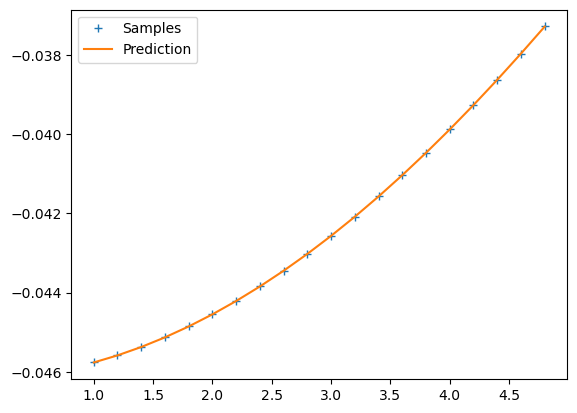

Relative l2 distance: 1.9290007851392774e-05


In [7]:
y_pred = parfam.predict(x).cpu().detach().numpy()
plt.plot(x, y, '+', label='Samples')
plt.plot(x, y_pred, label='Prediction')
plt.legend()
plt.show()

print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')


## 2 dimensional problem

In [8]:
a = 2 * torch.randn(1)
x = np.sort(np.random.uniform(-1.2, 5, 100))
x = np.random.uniform(-3, 3, 200).reshape(100, 2)
print(x.shape)
x = torch.tensor(x, device=device)

def func(a, x, module):
    return module.sin(x[0]) * x[1]


y = func(a, x.T, np)
x_sym = []
for i in range(x.shape[1]):
    x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(a, x_sym, sympy)
print(f'Target formula: {target_expr}')

(100, 2)
Target formula: x1*sin(x0)


In [9]:
# Assuming we already know that only the sin function is necessary:
functions = [torch.sin]
function_names = [sympy.sin]

In [10]:
parfam = ParFamWrapper(iterate=True, functions=functions, function_names=function_names, degree_input_denominator=0, degree_output_denominator=0)
parfam.fit(x, y, time_limit=100)

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1628: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6
INFO:root:Number of evaluations: 208


INFO:root:Relative l2 distance train: 0.422701900594247
INFO:root:Relative l2 distance validation: 0.37604533875606067
INFO:root:Training time: 0.1056520938873291
INFO:root:Cumulative training time: 0.10705184936523438
INFO:root:Cumulative number of evaluations: 208
INFO:root:New best relative l2 distance validation: 0.37604533875606067
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 7
INFO:root:Number parameters active: 7


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 100, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 6
Number parameters active: 6
Training time: 0.10565209

INFO:root:Number of evaluations: 907
INFO:root:Relative l2 distance train: 0.9346492975397658
INFO:root:Relative l2 distance validation: 1.012519006973158
INFO:root:Training time: 0.3679835796356201
INFO:root:Cumulative training time: 0.47701001167297363
INFO:root:Cumulative number of evaluations: 1115
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 0.3679835796356201
Target expression: None
Relative l_2-distance train: 0.9346492975397658
Relative l_2-distance validation: 1.012519006973158
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 651
INFO:root:Relative l2 distance train: 0.6355553307724993
INFO:root:Relative l2 distance validation: 0.7428192033424346
INFO:root:Training time: 0.2727658748626709
INFO:root:Cumulative training time: 0.7514727115631104
INFO:root:Cumulative number of evaluations: 1766
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 12
INFO:root:Number parameters active: 12


Training time: 0.2727658748626709
Target expression: None
Relative l_2-distance train: 0.6355553307724993
Relative l_2-distance validation: 0.7428192033424346
##### Training #####
Number parameters: 12
Number parameters active: 12


INFO:root:Number of evaluations: 805
INFO:root:Relative l2 distance train: 0.17093963536849657
INFO:root:Relative l2 distance validation: 0.14254720858902167
INFO:root:Training time: 0.48703718185424805
INFO:root:Cumulative training time: 1.2404589653015137
INFO:root:Cumulative number of evaluations: 2571
INFO:root:New best relative l2 distance validation: 0.14254720858902167
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 15
INFO:root:Number parameters active: 15


Training time: 0.48703718185424805
Target expression: None
Relative l_2-distance train: 0.17093963536849657
Relative l_2-distance validation: 0.14254720858902167
##### Training #####
Number parameters: 15
Number parameters active: 15


INFO:root:Number of evaluations: 1031
INFO:root:Relative l2 distance train: 0.3027252602221857
INFO:root:Relative l2 distance validation: 0.48124265830564816
INFO:root:Training time: 0.6442463397979736
INFO:root:Cumulative training time: 1.887798547744751
INFO:root:Cumulative number of evaluations: 3602
INFO:root:Time for multiprocessing in total: 1.9027276039123535
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance (train, val, test): (tensor(0.1709, dtype=torch.float64), tensor(0.1425, dtype=torch.float64), tensor(0.6131, dtype=torch.float64))
INFO:root:Best formula: -0.323*x0**2 + 0.518*x0*x1 + 0.967*x0*sin(0.761*x0 + 0.

Training time: 0.6442463397979736
Target expression: None
Relative l_2-distance train: 0.3027252602221857
Relative l_2-distance validation: 0.48124265830564816


In [11]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')


Target formula: x1*sin(x0)


Computed formula: -0.323*x0**2 + 0.518*x0*x1 + 0.967*x0*sin(0.761*x0 + 0.566*x1 + 0.05) - 0.005*x0 + 0.139*x1**2 - 0.26*x1*sin(0.761*x0 + 0.566*x1 + 0.05) + 0.052*x1 - 0.041*sin(0.761*x0 + 0.566*x1 + 0.05) - 0.178


In [12]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 0.31403189622411776


# More complicated functions

Test now the feynman formula III 10 19:
$$mom\sqrt{x^2+y^2+z^2}$$

In [13]:
n_datapoints = 500
dim = 4
x = np.random.uniform(1, dim, n_datapoints * dim).reshape(n_datapoints, dim)
print(x.shape)
x = torch.tensor(x, device=device)

def func(x, module):
    # return x[0] * (x[1]*(x[2]**2 + x[3]**2 + x[4]**2))**(1/2)
    return x[0] * ((x[2]**2 + x[3]**2 + x[1]**2))**(1/2)


y = func(x.T, np)
# x_sym = [sympy.symbols(symbol) for symbol in ['mom', 'B', 'x', 'y', 'z']]
x_sym = [sympy.symbols(symbol) for symbol in ['mom', 'x', 'y', 'z']]
# for i in range(x.shape[1]):
#     x_sym.append(sympy.symbols(f'x{i}'))
target_expr = func(x_sym, sympy)
print(f'Target formula: {target_expr}')

(500, 4)
Target formula: mom*(x**2 + y**2 + z**2)**0.5


In [14]:
# Assuming we already know that only the sqrt function is necessary.
# If we do not assume this knowledge, we could also just use the variable standard_functions and standard_function_names instead, it just takes more time.
# Do not define the sqrt here yourself by just defining it as torch.sqrt, since it is not defined on all reals, which is a problem for the optimizer. Thus, see how it was defined in the function_dict.  
functions = [function_dict['sqrt']]
function_names = [function_name_dict['sqrt']]

In [15]:
# ParFamWrapper with its most important input parameters
parfam = ParFamWrapper(iterate=True, # iterate through multiple different parametric families (costs more time, but is the better choice when one is not sure about the degrees and the functions of the target formula)
                       functions=functions, function_names=function_names, # which functions to use 
                       degree_input_numerator=2, degree_output_numerator=3, degree_input_denominator=0, degree_output_denominator=0,  # the maximal degrees of the polynomials in the parametric family
                       input_names=x_sym,  # the names of the input variables
                       enforce_function=False,  # has only an effect, if iterate=False
                       device='cpu', 
                       separate_test_set=True  # ParFam uses a smaller set for training, to use a part of it as a test set afterwards
                       )
parfam.fit(x, y, time_limit=100, seed=1234)  # If we cannot assume that degree_input_denominator=0 and degree_output_denominator=0 holds, we would have to increase the time limit

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1628: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 2110
INFO:root:Relative l2 distance train: 0.004852963370269322
INFO:root:Relative l2 distance validation: 0.006087892812096801
INFO:root:Training time: 1.0209622383117676
INFO:root:Cumulative training time: 1.0246734619140625
INFO:root:Cumulative number of evaluations: 2110
INFO:root:New best relative l2 distance validation: 0.006087892812096801
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.0209622383117676
Target expression: None
Relative l_2-distance train: 0.004852963370269322
Relative l_2-distance validation: 0.006087892812096801
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1200
INFO:root:Relative l2 distance train: 0.13312445273737974
INFO:root:Relative l2 distance validation: 0.10351078922403623
INFO:root:Training time: 0.6440615653991699
INFO:root:Cumulative training time: 1.6709041595458984
INFO:root:Cumulative number of evaluations: 3310
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.6440615653991699
Target expression: None
Relative l_2-distance train: 0.13312445273737974
Relative l_2-distance validation: 0.10351078922403623
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2061
INFO:root:Relative l2 distance train: 0.09910290090575284
INFO:root:Relative l2 distance validation: 0.10834654290855726
INFO:root:Training time: 1.0401601791381836
INFO:root:Cumulative training time: 2.7143964767456055
INFO:root:Cumulative number of evaluations: 5371
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 1.0401601791381836
Target expression: None
Relative l_2-distance train: 0.09910290090575284
Relative l_2-distance validation: 0.10834654290855726
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1867
INFO:root:Relative l2 distance train: 0.021225963392843238
INFO:root:Relative l2 distance validation: 0.02267919090976496
INFO:root:Training time: 1.7087528705596924
INFO:root:Cumulative training time: 4.425605058670044
INFO:root:Cumulative number of evaluations: 7238
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['function_0'], 'function_names': ['function_0'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 1.7087528705596924
Target expression: None
Relative l_2-distance train: 0.021225963392843238
Relative l_2-distance validation: 0.02267919090976496
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 3841
INFO:root:Relative l2 distance train: 1.2871244444645057e-07
INFO:root:Relative l2 distance validation: 1.4906590102158942e-07
INFO:root:Training time: 3.53725528717041
INFO:root:Cumulative training time: 7.9655115604400635
INFO:root:Cumulative number of evaluations: 11079
INFO:root:New best relative l2 distance validation: 1.4906590102158942e-07
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached
INFO:root:Time for multiprocessing in total: 7.977764844894409
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not ch

Training time: 3.53725528717041
Target expression: None
Relative l_2-distance train: 1.2871244444645057e-07
Relative l_2-distance validation: 1.4906590102158942e-07
Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached


In [16]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: mom*(x**2 + y**2 + z**2)**0.5
Computed formula: 1.00049737780766*x0*sqrt(Abs(x1**2 + x2**2 + x3**2))


In [17]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.650236287367951e-08


In [18]:
# If one has more time, one can also simply use the 'big' configuration (config_files/wrapper/big.ini) in the following way
parfam = ParFamWrapper(iterate=True, config_name='big')
parfam.fit(x, y, seed=1234, time_limit=500)

/home/math/scholl/projects/physicalLawLearning/parfam/train.py:1628: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, device=training_parameters['device']), torch.tensor(y, device=training_parameters['device'])
INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 0, 'degree_input_denominator': 0, 'function_names': [], 'width': 1, 'functions': [], 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 66
INFO:root:Number parameters active: 66


Training parameters: {'normalization': False, 'time_limit': 500, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0.0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 3, 'enforce_function_iterate': 'Both'}
Sequential computation
##### Training #####
Number parameters: 66
Number parameters active: 66


INFO:root:Number of evaluations: 3534
INFO:root:Relative l2 distance train: 0.002649219332609953
INFO:root:Relative l2 distance validation: 0.0029717487501623578
INFO:root:Training time: 5.353136301040649
INFO:root:Cumulative training time: 5.358363151550293
INFO:root:Cumulative number of evaluations: 3534
INFO:root:New best relative l2 distance validation: 0.0029717487501623578
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 5.353136301040649
Target expression: None
Relative l_2-distance train: 0.002649219332609953
Relative l_2-distance validation: 0.0029717487501623578
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 4480
INFO:root:Relative l2 distance train: 0.13909446416690732
INFO:root:Relative l2 distance validation: 0.12273609961672621
INFO:root:Training time: 1.8341166973114014
INFO:root:Cumulative training time: 7.1944286823272705
INFO:root:Cumulative number of evaluations: 8014
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 1.8341166973114014
Target expression: None
Relative l_2-distance train: 0.13909446416690732
Relative l_2-distance validation: 0.12273609961672621
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 2872
INFO:root:Relative l2 distance train: 0.022271135240979786
INFO:root:Relative l2 distance validation: 0.02310070459007912
INFO:root:Training time: 1.1935479640960693
INFO:root:Cumulative training time: 8.390474319458008
INFO:root:Cumulative number of evaluations: 10886
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 40
INFO:root:Number parameters active: 40


Training time: 1.1935479640960693
Target expression: None
Relative l_2-distance train: 0.022271135240979786
Relative l_2-distance validation: 0.02310070459007912
##### Training #####
Number parameters: 40
Number parameters active: 40


INFO:root:Number of evaluations: 3932
INFO:root:Relative l2 distance train: 0.00937179149041912
INFO:root:Relative l2 distance validation: 0.01089829477176194
INFO:root:Training time: 2.6037349700927734
INFO:root:Cumulative training time: 10.998070478439331
INFO:root:Cumulative number of evaluations: 14818
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 1, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 71
INFO:root:Number parameters active: 71


Training time: 2.6037349700927734
Target expression: None
Relative l_2-distance train: 0.00937179149041912
Relative l_2-distance validation: 0.01089829477176194
##### Training #####
Number parameters: 71
Number parameters active: 71


INFO:root:Number of evaluations: 4159
INFO:root:Relative l2 distance train: 0.0014949643709420378
INFO:root:Relative l2 distance validation: 0.002821844529561299
INFO:root:Training time: 6.258610963821411
INFO:root:Cumulative training time: 17.263200998306274
INFO:root:Cumulative number of evaluations: 18977
INFO:root:New best relative l2 distance validation: 0.002821844529561299
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 6.258610963821411
Target expression: None
Relative l_2-distance train: 0.0014949643709420378
Relative l_2-distance validation: 0.002821844529561299
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 4531
INFO:root:Relative l2 distance train: 0.055571229157699915
INFO:root:Relative l2 distance validation: 0.052855604558449246
INFO:root:Training time: 1.9895966053009033
INFO:root:Cumulative training time: 19.255276203155518
INFO:root:Cumulative number of evaluations: 23508
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 30
INFO:root:Number parameters active: 30


Training time: 1.9895966053009033
Target expression: None
Relative l_2-distance train: 0.055571229157699915
Relative l_2-distance validation: 0.052855604558449246
##### Training #####
Number parameters: 30
Number parameters active: 30


INFO:root:Number of evaluations: 3998
INFO:root:Relative l2 distance train: 0.016964628312630015
INFO:root:Relative l2 distance validation: 0.01795901247099571
INFO:root:Training time: 1.9093449115753174
INFO:root:Cumulative training time: 21.16730499267578
INFO:root:Cumulative number of evaluations: 27506
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 50
INFO:root:Number parameters active: 50


Training time: 1.9093449115753174
Target expression: None
Relative l_2-distance train: 0.016964628312630015
Relative l_2-distance validation: 0.01795901247099571
##### Training #####
Number parameters: 50
Number parameters active: 50


INFO:root:Number of evaluations: 4426
INFO:root:Relative l2 distance train: 0.0030946418680602022
INFO:root:Relative l2 distance validation: 0.005039512663853945
INFO:root:Training time: 6.680865049362183
INFO:root:Cumulative training time: 27.8515887260437
INFO:root:Cumulative number of evaluations: 31932
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 2, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 81
INFO:root:Number parameters active: 81


Training time: 6.680865049362183
Target expression: None
Relative l_2-distance train: 0.0030946418680602022
Relative l_2-distance validation: 0.005039512663853945
##### Training #####
Number parameters: 81
Number parameters active: 81


INFO:root:Number of evaluations: 4286
INFO:root:Relative l2 distance train: 0.004407325891034844
INFO:root:Relative l2 distance validation: 0.01842472666638459
INFO:root:Training time: 6.877220869064331
INFO:root:Cumulative training time: 34.73428702354431
INFO:root:Cumulative number of evaluations: 36218
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 1, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 40
INFO:root:Number parameters active: 40


Training time: 6.877220869064331
Target expression: None
Relative l_2-distance train: 0.004407325891034844
Relative l_2-distance validation: 0.01842472666638459
##### Training #####
Number parameters: 40
Number parameters active: 40


INFO:root:Number of evaluations: 5255
INFO:root:Relative l2 distance train: 0.08231378060510092
INFO:root:Relative l2 distance validation: 0.2727775416316353
INFO:root:Training time: 4.180423736572266
INFO:root:Cumulative training time: 38.918113231658936
INFO:root:Cumulative number of evaluations: 41473
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 2, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 50
INFO:root:Number parameters active: 50


Training time: 4.180423736572266
Target expression: None
Relative l_2-distance train: 0.08231378060510092
Relative l_2-distance validation: 0.2727775416316353
##### Training #####
Number parameters: 50
Number parameters active: 50


INFO:root:Number of evaluations: 5094
INFO:root:Relative l2 distance train: 0.03891131324960259
INFO:root:Relative l2 distance validation: 0.17120852251286772
INFO:root:Training time: 7.704194068908691
INFO:root:Cumulative training time: 46.62763285636902
INFO:root:Cumulative number of evaluations: 46567
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 3, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 70
INFO:root:Number parameters active: 70


Training time: 7.704194068908691
Target expression: None
Relative l_2-distance train: 0.03891131324960259
Relative l_2-distance validation: 0.17120852251286772
##### Training #####
Number parameters: 70
Number parameters active: 70


INFO:root:Number of evaluations: 5108
INFO:root:Relative l2 distance train: 0.022461869100168008
INFO:root:Relative l2 distance validation: 0.03255393537415464
INFO:root:Training time: 8.584386825561523
INFO:root:Cumulative training time: 55.217254877090454
INFO:root:Cumulative number of evaluations: 51675
INFO:root:Model parameters: {'degree_input_polynomials': 0, 'degree_output_polynomials': 4, 'degree_output_denominator': 3, 'degree_input_denominator': 0, 'functions': [], 'function_names': [], 'width': 1, 'degree_output_polynomials_specific': None, 'degree_output_polynomials_denominator_specific': None, 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 101
INFO:root:Number parameters active: 101


Training time: 8.584386825561523
Target expression: None
Relative l_2-distance train: 0.022461869100168008
Relative l_2-distance validation: 0.03255393537415464
##### Training #####
Number parameters: 101
Number parameters active: 101


INFO:root:Number of evaluations: 4739
INFO:root:Relative l2 distance train: 0.001495305131702687
INFO:root:Relative l2 distance validation: 0.0022583414890591127
INFO:root:Training time: 8.950591802597046
INFO:root:Cumulative training time: 64.17437934875488
INFO:root:Cumulative number of evaluations: 56414
INFO:root:New best relative l2 distance validation: 0.0022583414890591127
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 8.950591802597046
Target expression: None
Relative l_2-distance train: 0.001495305131702687
Relative l_2-distance validation: 0.0022583414890591127
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1232
INFO:root:Relative l2 distance train: 0.17500446121820853
INFO:root:Relative l2 distance validation: 0.1652432434640407
INFO:root:Training time: 0.6291379928588867
INFO:root:Cumulative training time: 64.80560350418091
INFO:root:Cumulative number of evaluations: 57646
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.6291379928588867
Target expression: None
Relative l_2-distance train: 0.17500446121820853
Relative l_2-distance validation: 0.1652432434640407
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 1002
INFO:root:Relative l2 distance train: 0.3392887576359784
INFO:root:Relative l2 distance validation: 0.35252390268263006
INFO:root:Training time: 0.4419126510620117
INFO:root:Cumulative training time: 65.24990892410278
INFO:root:Cumulative number of evaluations: 58648
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.4419126510620117
Target expression: None
Relative l_2-distance train: 0.3392887576359784
Relative l_2-distance validation: 0.35252390268263006
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1260
INFO:root:Relative l2 distance train: 0.14311937772781627
INFO:root:Relative l2 distance validation: 0.13051602580693394
INFO:root:Training time: 0.6455516815185547
INFO:root:Cumulative training time: 65.89766716957092
INFO:root:Cumulative number of evaluations: 59908
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.6455516815185547
Target expression: None
Relative l_2-distance train: 0.14311937772781627
Relative l_2-distance validation: 0.13051602580693394
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 716
INFO:root:Relative l2 distance train: 2.7606375257548526
INFO:root:Relative l2 distance validation: 2.6923892106690634
INFO:root:Training time: 0.3183314800262451
INFO:root:Cumulative training time: 66.21763277053833
INFO:root:Cumulative number of evaluations: 60624
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 0.3183314800262451
Target expression: None
Relative l_2-distance train: 2.7606375257548526
Relative l_2-distance validation: 2.6923892106690634
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1245
INFO:root:Relative l2 distance train: 0.14468964074456217
INFO:root:Relative l2 distance validation: 0.12531563141426094
INFO:root:Training time: 0.668881893157959
INFO:root:Cumulative training time: 66.88848352432251
INFO:root:Cumulative number of evaluations: 61869
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 6
INFO:root:Number parameters active: 6


Training time: 0.668881893157959
Target expression: None
Relative l_2-distance train: 0.14468964074456217
Relative l_2-distance validation: 0.12531563141426094
##### Training #####
Number parameters: 6
Number parameters active: 6


INFO:root:Number of evaluations: 988
INFO:root:Relative l2 distance train: 0.1734012904685096
INFO:root:Relative l2 distance validation: 0.15055360914975927
INFO:root:Training time: 0.48276686668395996
INFO:root:Cumulative training time: 67.37283301353455
INFO:root:Cumulative number of evaluations: 62857
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.48276686668395996
Target expression: None
Relative l_2-distance train: 0.1734012904685096
Relative l_2-distance validation: 0.15055360914975927
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2241
INFO:root:Relative l2 distance train: 0.046567999645406456
INFO:root:Relative l2 distance validation: 0.053232226247535
INFO:root:Training time: 1.1701436042785645
INFO:root:Cumulative training time: 68.54548597335815
INFO:root:Cumulative number of evaluations: 65098
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.1701436042785645
Target expression: None
Relative l_2-distance train: 0.046567999645406456
Relative l_2-distance validation: 0.053232226247535
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2163
INFO:root:Relative l2 distance train: 0.1408765653665603
INFO:root:Relative l2 distance validation: 0.18108611701455513
INFO:root:Training time: 0.9284558296203613
INFO:root:Cumulative training time: 69.47666645050049
INFO:root:Cumulative number of evaluations: 67261
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.9284558296203613
Target expression: None
Relative l_2-distance train: 0.1408765653665603
Relative l_2-distance validation: 0.18108611701455513
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2054
INFO:root:Relative l2 distance train: 0.18112700713906021
INFO:root:Relative l2 distance validation: 0.17502421258550632
INFO:root:Training time: 1.0329406261444092
INFO:root:Cumulative training time: 70.51267910003662
INFO:root:Cumulative number of evaluations: 69315
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.0329406261444092
Target expression: None
Relative l_2-distance train: 0.18112700713906021
Relative l_2-distance validation: 0.17502421258550632
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 1807
INFO:root:Relative l2 distance train: 2.619838881769492
INFO:root:Relative l2 distance validation: 2.680333920730007
INFO:root:Training time: 0.7708935737609863
INFO:root:Cumulative training time: 71.28602719306946
INFO:root:Cumulative number of evaluations: 71122
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 0.7708935737609863
Target expression: None
Relative l_2-distance train: 2.619838881769492
Relative l_2-distance validation: 2.680333920730007
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2492
INFO:root:Relative l2 distance train: 0.1827910815811785
INFO:root:Relative l2 distance validation: 0.1754486308259725
INFO:root:Training time: 1.416306972503662
INFO:root:Cumulative training time: 72.70715594291687
INFO:root:Cumulative number of evaluations: 73614
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.416306972503662
Target expression: None
Relative l_2-distance train: 0.1827910815811785
Relative l_2-distance validation: 0.1754486308259725
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2026
INFO:root:Relative l2 distance train: 0.041111072067966374
INFO:root:Relative l2 distance validation: 0.03982159664063033
INFO:root:Training time: 1.0262653827667236
INFO:root:Cumulative training time: 73.73602199554443
INFO:root:Cumulative number of evaluations: 75640
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.0262653827667236
Target expression: None
Relative l_2-distance train: 0.041111072067966374
Relative l_2-distance validation: 0.03982159664063033
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2741
INFO:root:Relative l2 distance train: 0.09058738874325475
INFO:root:Relative l2 distance validation: 0.09688020442951956
INFO:root:Training time: 1.6603798866271973
INFO:root:Cumulative training time: 75.39831900596619
INFO:root:Cumulative number of evaluations: 78381
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.6603798866271973
Target expression: None
Relative l_2-distance train: 0.09058738874325475
Relative l_2-distance validation: 0.09688020442951956
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 3934
INFO:root:Relative l2 distance train: 0.15793362973689043
INFO:root:Relative l2 distance validation: 0.13514706052250905
INFO:root:Training time: 2.1106560230255127
INFO:root:Cumulative training time: 77.51093912124634
INFO:root:Cumulative number of evaluations: 82315
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 2.1106560230255127
Target expression: None
Relative l_2-distance train: 0.15793362973689043
Relative l_2-distance validation: 0.13514706052250905
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2858
INFO:root:Relative l2 distance train: 0.09203654623936382
INFO:root:Relative l2 distance validation: 0.1103735979094763
INFO:root:Training time: 1.7093889713287354
INFO:root:Cumulative training time: 79.22231006622314
INFO:root:Cumulative number of evaluations: 85173
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.7093889713287354
Target expression: None
Relative l_2-distance train: 0.09203654623936382
Relative l_2-distance validation: 0.1103735979094763
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 2677
INFO:root:Relative l2 distance train: 1.380238519582754
INFO:root:Relative l2 distance validation: 1.5207550739119384
INFO:root:Training time: 1.376612663269043
INFO:root:Cumulative training time: 80.60158777236938
INFO:root:Cumulative number of evaluations: 87850
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 16
INFO:root:Number parameters active: 16


Training time: 1.376612663269043
Target expression: None
Relative l_2-distance train: 1.380238519582754
Relative l_2-distance validation: 1.5207550739119384
##### Training #####
Number parameters: 16
Number parameters active: 16


INFO:root:Number of evaluations: 2413
INFO:root:Relative l2 distance train: 0.07569868023240849
INFO:root:Relative l2 distance validation: 0.08406052004637231
INFO:root:Training time: 1.6558151245117188
INFO:root:Cumulative training time: 82.26087069511414
INFO:root:Cumulative number of evaluations: 90263
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 11
INFO:root:Number parameters active: 11


Training time: 1.6558151245117188
Target expression: None
Relative l_2-distance train: 0.07569868023240849
Relative l_2-distance validation: 0.08406052004637231
##### Training #####
Number parameters: 11
Number parameters active: 11


INFO:root:Number of evaluations: 1909
INFO:root:Relative l2 distance train: 0.1391071014697656
INFO:root:Relative l2 distance validation: 0.12435098597039909
INFO:root:Training time: 1.1751353740692139
INFO:root:Cumulative training time: 83.44028782844543
INFO:root:Cumulative number of evaluations: 92172
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.1751353740692139
Target expression: None
Relative l_2-distance train: 0.1391071014697656
Relative l_2-distance validation: 0.12435098597039909
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 2569
INFO:root:Relative l2 distance train: 0.1568614786088103
INFO:root:Relative l2 distance validation: 0.16835490956744187
INFO:root:Training time: 1.536874771118164
INFO:root:Cumulative training time: 84.97976899147034
INFO:root:Cumulative number of evaluations: 94741
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 1.536874771118164
Target expression: None
Relative l_2-distance train: 0.1568614786088103
Relative l_2-distance validation: 0.16835490956744187
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 3272
INFO:root:Relative l2 distance train: 0.13791368562262774
INFO:root:Relative l2 distance validation: 0.18030521221399975
INFO:root:Training time: 1.7576916217803955
INFO:root:Cumulative training time: 86.73954606056213
INFO:root:Cumulative number of evaluations: 98013
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.7576916217803955
Target expression: None
Relative l_2-distance train: 0.13791368562262774
Relative l_2-distance validation: 0.18030521221399975
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 2155
INFO:root:Relative l2 distance train: 0.265092404180135
INFO:root:Relative l2 distance validation: 0.2876214055004252
INFO:root:Training time: 1.28196120262146
INFO:root:Cumulative training time: 88.02420043945312
INFO:root:Cumulative number of evaluations: 100168
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 1.28196120262146
Target expression: None
Relative l_2-distance train: 0.265092404180135
Relative l_2-distance validation: 0.2876214055004252
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 2605
INFO:root:Relative l2 distance train: 2.7234345892949374
INFO:root:Relative l2 distance validation: 2.871033273903371
INFO:root:Training time: 1.526392936706543
INFO:root:Cumulative training time: 89.55296421051025
INFO:root:Cumulative number of evaluations: 102773
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.526392936706543
Target expression: None
Relative l_2-distance train: 2.7234345892949374
Relative l_2-distance validation: 2.871033273903371
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 908
INFO:root:Relative l2 distance train: 0.18181747970445722
INFO:root:Relative l2 distance validation: 0.1747793538052086
INFO:root:Training time: 0.5655672550201416
INFO:root:Cumulative training time: 90.12132263183594
INFO:root:Cumulative number of evaluations: 103681
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 1, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21
INFO:root:Number of evaluations: 47
INFO:root:Relative l2 distance train: 128.93436698917904
INFO:root:Relative l2 distance validation: 106.81550848714404
INFO:root:Training time: 0.030332326889038086
INFO:root:Cumulative training time: 90.15459418296814
INFO:r

Training time: 0.5655672550201416
Target expression: None
Relative l_2-distance train: 0.18181747970445722
Relative l_2-distance validation: 0.1747793538052086
##### Training #####
Number parameters: 21
Number parameters active: 21
Training time: 0.030332326889038086
Target expression: None
Relative l_2-distance train: 128.93436698917904
Relative l_2-distance validation: 106.81550848714404
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 3779
INFO:root:Relative l2 distance train: 0.02723379414444421
INFO:root:Relative l2 distance validation: 0.030622951513354972
INFO:root:Training time: 2.369960308074951
INFO:root:Cumulative training time: 92.52761912345886
INFO:root:Cumulative number of evaluations: 107507
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.369960308074951
Target expression: None
Relative l_2-distance train: 0.02723379414444421
Relative l_2-distance validation: 0.030622951513354972
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 4079
INFO:root:Relative l2 distance train: 0.746996493253091
INFO:root:Relative l2 distance validation: 1.3408442335496236
INFO:root:Training time: 2.3762428760528564
INFO:root:Cumulative training time: 94.90616250038147
INFO:root:Cumulative number of evaluations: 111586
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 2.3762428760528564
Target expression: None
Relative l_2-distance train: 0.746996493253091
Relative l_2-distance validation: 1.3408442335496236
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 4174
INFO:root:Relative l2 distance train: 0.04844385306619434
INFO:root:Relative l2 distance validation: 0.19264931350903075
INFO:root:Training time: 2.507544994354248
INFO:root:Cumulative training time: 97.41808462142944
INFO:root:Cumulative number of evaluations: 115760
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.507544994354248
Target expression: None
Relative l_2-distance train: 0.04844385306619434
Relative l_2-distance validation: 0.19264931350903075
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 3335
INFO:root:Relative l2 distance train: 0.9546978640715017
INFO:root:Relative l2 distance validation: 1.3821408827612718
INFO:root:Training time: 1.78297758102417
INFO:root:Cumulative training time: 99.20460677146912
INFO:root:Cumulative number of evaluations: 119095
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 26
INFO:root:Number parameters active: 26


Training time: 1.78297758102417
Target expression: None
Relative l_2-distance train: 0.9546978640715017
Relative l_2-distance validation: 1.3821408827612718
##### Training #####
Number parameters: 26
Number parameters active: 26


INFO:root:Number of evaluations: 3191
INFO:root:Relative l2 distance train: 0.7307338045115238
INFO:root:Relative l2 distance validation: 0.7024169098247253
INFO:root:Training time: 2.100618600845337
INFO:root:Cumulative training time: 101.30928158760071
INFO:root:Cumulative number of evaluations: 122286
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 21
INFO:root:Number parameters active: 21


Training time: 2.100618600845337
Target expression: None
Relative l_2-distance train: 0.7307338045115238
Relative l_2-distance validation: 0.7024169098247253
##### Training #####
Number parameters: 21
Number parameters active: 21


INFO:root:Number of evaluations: 3596
INFO:root:Relative l2 distance train: 2.777982910302428
INFO:root:Relative l2 distance validation: 2.6948262334269937
INFO:root:Training time: 2.180906295776367
INFO:root:Cumulative training time: 103.4938395023346
INFO:root:Cumulative number of evaluations: 125882
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 2.180906295776367
Target expression: None
Relative l_2-distance train: 2.777982910302428
Relative l_2-distance validation: 2.6948262334269937
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 4630
INFO:root:Relative l2 distance train: 0.025091384806009313
INFO:root:Relative l2 distance validation: 0.024427643622541725
INFO:root:Training time: 3.0305891036987305
INFO:root:Cumulative training time: 106.52798342704773
INFO:root:Cumulative number of evaluations: 130512
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 3.0305891036987305
Target expression: None
Relative l_2-distance train: 0.025091384806009313
Relative l_2-distance validation: 0.024427643622541725
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 5287
INFO:root:Relative l2 distance train: 0.5865125425608894
INFO:root:Relative l2 distance validation: 0.4152942192447311
INFO:root:Training time: 2.9784538745880127
INFO:root:Cumulative training time: 109.50911712646484
INFO:root:Cumulative number of evaluations: 135799
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 2.9784538745880127
Target expression: None
Relative l_2-distance train: 0.5865125425608894
Relative l_2-distance validation: 0.4152942192447311
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 4208
INFO:root:Relative l2 distance train: 0.028524428503353284
INFO:root:Relative l2 distance validation: 0.03177562590551201
INFO:root:Training time: 2.564307689666748
INFO:root:Cumulative training time: 112.07946729660034
INFO:root:Cumulative number of evaluations: 140007
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 2.564307689666748
Target expression: None
Relative l_2-distance train: 0.028524428503353284
Relative l_2-distance validation: 0.03177562590551201
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 4146
INFO:root:Relative l2 distance train: 2.702660595823449
INFO:root:Relative l2 distance validation: 2.7073709065421583
INFO:root:Training time: 2.2807509899139404
INFO:root:Cumulative training time: 114.36330389976501
INFO:root:Cumulative number of evaluations: 144153
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 36
INFO:root:Number parameters active: 36


Training time: 2.2807509899139404
Target expression: None
Relative l_2-distance train: 2.702660595823449
Relative l_2-distance validation: 2.7073709065421583
##### Training #####
Number parameters: 36
Number parameters active: 36


INFO:root:Number of evaluations: 1259
INFO:root:Relative l2 distance train: 1921.2119911331245
INFO:root:Relative l2 distance validation: 1484.4719518660727
INFO:root:Training time: 0.8308532238006592
INFO:root:Cumulative training time: 115.19729828834534
INFO:root:Cumulative number of evaluations: 145412
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 1, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 2, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 31
INFO:root:Number parameters active: 31


Training time: 0.8308532238006592
Target expression: None
Relative l_2-distance train: 1921.2119911331245
Relative l_2-distance validation: 1484.4719518660727
##### Training #####
Number parameters: 31
Number parameters active: 31


INFO:root:Number of evaluations: 3322
INFO:root:Relative l2 distance train: 0.01685649871377114
INFO:root:Relative l2 distance validation: 0.01578434387046828
INFO:root:Training time: 1.969008445739746
INFO:root:Cumulative training time: 117.16991639137268
INFO:root:Cumulative number of evaluations: 148734
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 1.969008445739746
Target expression: None
Relative l_2-distance train: 0.01685649871377114
Relative l_2-distance validation: 0.01578434387046828
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1638
INFO:root:Relative l2 distance train: 0.023094336102675007
INFO:root:Relative l2 distance validation: 0.023368240903921287
INFO:root:Training time: 1.713991403579712
INFO:root:Cumulative training time: 118.88674139976501
INFO:root:Cumulative number of evaluations: 150372
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.713991403579712
Target expression: None
Relative l_2-distance train: 0.023094336102675007
Relative l_2-distance validation: 0.023368240903921287
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1345
INFO:root:Relative l2 distance train: 0.07074495348783953
INFO:root:Relative l2 distance validation: 0.07545048232695059
INFO:root:Training time: 0.9600250720977783
INFO:root:Cumulative training time: 119.84861350059509
INFO:root:Cumulative number of evaluations: 151717
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 0.9600250720977783
Target expression: None
Relative l_2-distance train: 0.07074495348783953
Relative l_2-distance validation: 0.07545048232695059
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1843
INFO:root:Relative l2 distance train: 0.01961996083352315
INFO:root:Relative l2 distance validation: 0.020048714526652953
INFO:root:Training time: 1.677692174911499
INFO:root:Cumulative training time: 121.52869749069214
INFO:root:Cumulative number of evaluations: 153560
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['cos'], 'function_names': ['cos'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.677692174911499
Target expression: None
Relative l_2-distance train: 0.01961996083352315
Relative l_2-distance validation: 0.020048714526652953
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1505
INFO:root:Relative l2 distance train: 0.07449497672403774
INFO:root:Relative l2 distance validation: 0.07217949785265211
INFO:root:Training time: 1.1680881977081299
INFO:root:Cumulative training time: 122.69954562187195
INFO:root:Cumulative number of evaluations: 155065
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 25
INFO:root:Number parameters active: 25


Training time: 1.1680881977081299
Target expression: None
Relative l_2-distance train: 0.07449497672403774
Relative l_2-distance validation: 0.07217949785265211
##### Training #####
Number parameters: 25
Number parameters active: 25


INFO:root:Number of evaluations: 1910
INFO:root:Relative l2 distance train: 0.023182569087206378
INFO:root:Relative l2 distance validation: 0.02366105303802664
INFO:root:Training time: 1.911085605621338
INFO:root:Cumulative training time: 124.61307835578918
INFO:root:Cumulative number of evaluations: 156975
INFO:root:Model parameters: {'degree_input_polynomials': 1, 'degree_output_polynomials': 2, 'functions': ['exp'], 'function_names': ['exp'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 10
INFO:root:Number parameters active: 10


Training time: 1.911085605621338
Target expression: None
Relative l_2-distance train: 0.023182569087206378
Relative l_2-distance validation: 0.02366105303802664
##### Training #####
Number parameters: 10
Number parameters active: 10


INFO:root:Number of evaluations: 1524
INFO:root:Relative l2 distance train: 0.14601914640181246
INFO:root:Relative l2 distance validation: 0.13643488602978696
INFO:root:Training time: 1.0903465747833252
INFO:root:Cumulative training time: 125.705246925354
INFO:root:Cumulative number of evaluations: 158499
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': False, 'maximal_potence': 3}
INFO:root:Number parameters: 35
INFO:root:Number parameters active: 35


Training time: 1.0903465747833252
Target expression: None
Relative l_2-distance train: 0.14601914640181246
Relative l_2-distance validation: 0.13643488602978696
##### Training #####
Number parameters: 35
Number parameters active: 35


INFO:root:Number of evaluations: 4027
INFO:root:Relative l2 distance train: 0.00032481008631229984
INFO:root:Relative l2 distance validation: 0.00032817492889557887
INFO:root:Training time: 3.848068952560425
INFO:root:Cumulative training time: 129.55636739730835
INFO:root:Cumulative number of evaluations: 162526
INFO:root:New best relative l2 distance validation: 0.00032817492889557887
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 2, 'functions': ['sqrt'], 'function_names': ['sqrt'], 'width': 1, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [1], 'degree_output_polynomials_denominator_specific': [1], 'enforce_function': True, 'maximal_potence': 3}
INFO:root:Number parameters: 20
INFO:root:Number parameters active: 20


Training time: 3.848068952560425
Target expression: None
Relative l_2-distance train: 0.00032481008631229984
Relative l_2-distance validation: 0.00032817492889557887
##### Training #####
Number parameters: 20
Number parameters active: 20


INFO:root:Number of evaluations: 4726
INFO:root:Relative l2 distance train: 7.53151849457589e-06
INFO:root:Relative l2 distance validation: 8.180310709956026e-06
INFO:root:Training time: 3.5112245082855225
INFO:root:Cumulative training time: 133.07068252563477
INFO:root:Cumulative number of evaluations: 167252
INFO:root:New best relative l2 distance validation: 8.180310709956026e-06
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached
INFO:root:Time for multiprocessing in total: 133.2012062072754
INFO:root:Finetuning with this cut off would not change anything.


Training time: 3.5112245082855225
Target expression: None
Relative l_2-distance train: 7.53151849457589e-06
Relative l_2-distance validation: 8.180310709956026e-06
Terminate proccess, wanted accuracy 0.001 and number of active parameters 4 / 10 was reached


INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance (train, val, test): (tensor(7.5315e-06, dtype=torch.float64), tensor(8.1803e-06, dtype=torch.float64), tensor(7.8988e-06, dtype=torch.float64))
INFO:root:Best formula: 1.133*x0*sqrt(Abs(0.779*x1**2 + 0.779*x2**2 + 0.779*x3**2)) best training time: 3.5112245082855225


In [19]:
print(f'Target formula: {target_expr}')
print(f'Computed formula: {parfam.formula_reduced.simplify()}')

Target formula: mom*(x**2 + y**2 + z**2)**0.5
Computed formula: 0.999996865495087*x0*sqrt(Abs(x1**2 + x2**2 + x3**2))


In [20]:
y_pred = parfam.predict(x).cpu().detach().numpy()
print(f'Relative l2 distance: {np.linalg.norm(y - y_pred, ord=2) / np.linalg.norm(y, ord=2)}')

Relative l2 distance: 3.357728362046558e-08


# Custom loss

Try the custom_loss from parfam_wrapper:

Instead of fitting f(x) to y (||f(x)-y||), fit f(x) to y^2 (||f(x)-y^2||). In this case, the same could be achieved with by simply recasting $\tilde y= y^2$, but this custom_loss can be modified to arbitrary settings, that might be not possible otherwise.

INFO:root:Sequential computation
INFO:root:Model parameters: {'degree_input_polynomials': 2, 'degree_output_polynomials': 4, 'degree_input_denominator': 0, 'degree_output_denominator': 0, 'degree_output_polynomials_specific': [], 'degree_output_polynomials_denominator_specific': [], 'width': 1, 'function_names': [], 'enforce_function': False, 'maximal_potence': 4, 'functions': []}
INFO:root:Number parameters: 5
INFO:root:Number parameters active: 5


Training parameters: {'normalization': False, 'time_limit': 100, 'evaluations_limit': 1000000, 'max_dataset_length': 500, 'model': 'ParFamTorch', 'target_noise': 0.0, 'feature_noise': 0.0, 'seed': 1234, 'accuracy': 0.0001, 'maxiter1': 100, 'maxiter2': 0, 'optimizer': 'basinhopping', 'pruning_iterations': 1, 'pruning_cut_off': 0.01, 'classifier': None, 'local_minimizer': 'BFGS', 'maxiter_per_dim_local_minimizer': 100, 'lambda_1': 0.001, 'repetitions': 1, 'parallel': False, 'n_processes': 4, 'lambda_1_cut': 0, 'lambda_1_piecewise': 0, 'device': 'cpu', 'iterative_finetuning': True, 'max_n_active_parameters': 10, 'lambda_1_finetuning': 1e-05, 'path_pretrained': 'Flexible dimension/full_19_big_training_sets/20240427_070711_5M/Datetime_20240427_070717_Loss_training_set_size_797545_batch_size_341_hidden_dim_256.pt', 'topk_predictions': 10, 'enforce_function_iterate': 'False'}
Sequential computation
##### Training #####
Number parameters: 5
Number parameters active: 5


INFO:root:Number of evaluations: 0
INFO:root:Custom loss train: 2.242207231256821e-07
INFO:root:Custom loss val: 2.611264088802875e-07
INFO:root:Training time: 0.6437020301818848
INFO:root:Cumulative training time: 0.645289421081543
INFO:root:Cumulative number of evaluations: 0
INFO:root:New best custom loss validation: 2.611264088802875e-07
INFO:root:Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached
INFO:root:Time for multiprocessing in total: 0.6487636566162109
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Finetuning with this cut off would not change anything.
INFO:root:Best distance (tr

Training time: 0.6437020301818848
Target expression: None
Custom loss train: 2.242207231256821e-07
Custom loss val: 2.611264088802875e-07
Terminate proccess, wanted accuracy 0.001 and number of active parameters 2 / 10 was reached
Stop
Caught exception: size mismatch, got input (300), mat (300x5), vec (2)


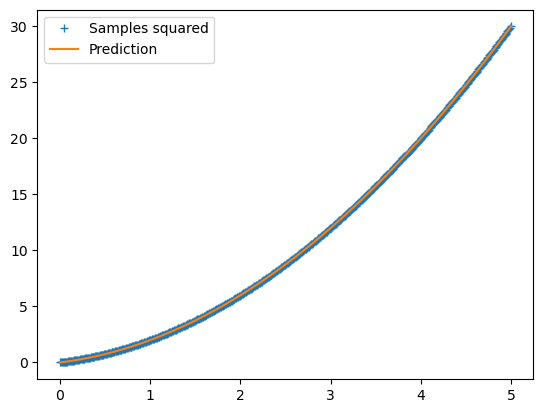

In [ ]:
functions = []
function_names = []

n_data_points = 500 

x = np.linspace(0, 5, n_data_points).reshape(n_data_points,1)
y = ((x**2 + x)**(1/2)).flatten()

def custom_loss(y_pred, y):
    return torch.norm(y_pred - y**2, p=2) / torch.norm(y, p=2)

parfam = ParFamWrapper(config_name='small', iterate=False, degree_input_denominator=0, degree_output_denominator=0, function_names=function_names, functions=functions, 
                        degree_output_numerator=4, maximal_potence=4)
parfam.fit(x=x, y=y, custom_loss=custom_loss)

b_pred = parfam.predict(a)

plt.plot(x, y**2, '+', label='Samples squared')
plt.plot(x, y_pred, label='Prediction')
plt.legend()

In [22]:
parfam.get_formula(['x'])

1.0*x**2 + 1.0*x